In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

In [3]:
class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df

In [4]:
DataLoader_obj= DataLoader('../Notebooks','cleaned_fintech_data.csv')

In [5]:
#To read csv file and create dataframe
tweets = pd.read_csv('cleaned_fintech_data.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [6]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

In [7]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 17941
Columons having columns value:Index(['Unnamed: 0', 'clean_text', 'possibly_sensitive', 'hashtags', 'place',
       'place_coord_boundaries'],
      dtype='object')


In [8]:
'''
Data Preparation
'''

'\nData Preparation\n'

In [9]:
tweets_df = pd.DataFrame(columns=['original_text','clean_text','lang'])

tweets_df['original_text'] =  tweets['original_text'].to_list()
tweets_df['clean_text'] =  tweets['clean_text'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()

In [10]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,original_text,clean_text,lang
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en
...,...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en
5617,Idhi me bathuku \nMost Day1 Records In Nizam f...,Idhi bathuku Most Day1 Records In Nizam Non BB...,in
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en
5619,Manam edi chesina \n\nDaaniki kuda elevation i...,Manam edi chesina Daaniki kuda elevation istad...,et


In [13]:
cleanTweet= pd.DataFrame(columns=['clean_text','polarity'])
cleanTweet['polarity'] =  tweets['polarity'].to_list()
cleanTweet['clean_text'] =  tweets['clean_text'].to_list()

In [14]:
cleanTweet.dropna()
cleanTweet

,clean_text,polarity
0,Giving forth life becoming burden Kenya This m...,0.3194444444444445
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.0
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.0
3,Today World Day Combat Restoring degraded land...,0.25
4,Hearing say 's confident vaccines delivered li...,0.5
...,...,...
5616,Lambie voted AGAINST Medivac Carbon tax protec...,0.13636363636363635
5617,Idhi bathuku Most Day1 Records In Nizam Non BB...,0.5
5618,welkin moon giveaway bc finally money -u got t...,0.15416666666666667
5619,Manam edi chesina Daaniki kuda elevation istad...,0.0


In [15]:
def text_category(p):
        if p > 0:
            return 'positive'
        elif p < 0:
            return 'negative'
        else:
            return 'neutral'

In [16]:
cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'],errors='coerce') # change polarity to numeric
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,0.000000,neutral
2,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,0.000000,neutral
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Hearing say 's confident vaccines delivered li...,0.500000,positive


In [21]:
#Visualize The  𝐬𝐜𝐨𝐫𝐞  column using piechart and barchart
#summary function about the score
def counts_numOfPNN(List_of_Score):
    x=List_of_Score
    
    #returns a dictiory of which there is key and value
    
    return {
        'positive': x.count('positive'),
        'neutral': x.count('neutral'),
        'negative': x.count('negative')  }

In [22]:
counts_of_PNN = counts_numOfPNN(list(cleanTweet['score']))
labels = list(counts_of_PNN.keys())
data = list(counts_of_PNN.values())

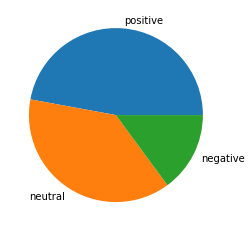

In [23]:
# plot it
fig = plt.figure()
plt.pie(data, labels = labels)
plt.show()

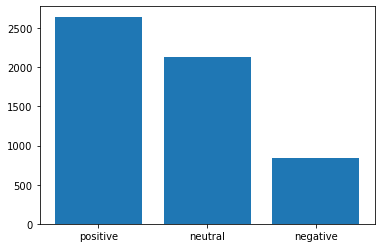

In [24]:
figg=plt.figure()
plt.bar(labels,data)
plt.show()

In [25]:
# Remove rows from cleanTweest where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   = 0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral) and reset the frame index.
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral'].reset_index(drop=True)

In [26]:
cleanTweet.head()

,clean_text,polarity,score
0,Giving forth life becoming burden Kenya This m...,0.319444,positive
1,Today World Day Combat Restoring degraded land...,0.250000,positive
2,Hearing say 's confident vaccines delivered li...,0.500000,positive
3,Today World Day Combat Restoring degraded land...,0.250000,positive
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive


In [27]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def score_to_bin(scr):
    scor = (1 if scr == 'positive' else 0)
    return scor

In [28]:
cleanTweet['scoremap'] = cleanTweet['score'].apply(score_to_bin).dropna()

In [29]:
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,Giving forth life becoming burden Kenya This m...,0.319444,positive,1
1,Today World Day Combat Restoring degraded land...,0.250000,positive,1
2,Hearing say 's confident vaccines delivered li...,0.500000,positive,1
3,Today World Day Combat Restoring degraded land...,0.250000,positive,1
4,Austria `` right '' grid tariffs regulatory re...,0.285714,positive,1


In [32]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [33]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

AttributeError: 'DataFrame' object has no attribute 'hashtags'

In [34]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)
print(tweets_df['hashtags'])

0                                                      []
1                                                      []
2                                                      []
3       [#Desertification, #Drought, #resilience, #bio...
4                         [#GregHunt, #Morrison, #auspol]
                              ...                        
5616                                             [#QandA]
5617                                                   []
5618                                                   []
5619                                                   []
5620                                                   []
Name: hashtags, Length: 5621, dtype: object


In [35]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [36]:
hashtags_list_df

,hashtags
3,"[#Desertification, #Drought, #resilience, #bio..."
4,"[#GregHunt, #Morrison, #auspol]"
5,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,..."
6,"[#Desertification, #Drought, #resilience, #bio..."
9,[#microgrids]
...,...
5611,[#QandA]
5613,"[#npcindia, #webinar, #wastemgmt, #carboncredi..."
5614,"[#mobilemoney, #Burundi, #youth, #innovation]"
5615,"[#CarbonSmart, #OurCleanFuture]"


In [37]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [38]:
flattened_hashtags_df

,hashtag
0,#Desertification
1,#Drought
2,#resilience
3,#biodiversity
4,#climatechange
...,...
4245,#youth
4246,#innovation
4247,#CarbonSmart
4248,#OurCleanFuture


In [39]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [40]:
tweets_df

,original_text,clean_text,lang,hashtags,flattened_hashtags
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en,[],#Desertification
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in,[],#Drought
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi,[],#resilience
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#biodiversity
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en,"[#GregHunt, #Morrison, #auspol]",#climatechange
...,...,...,...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en,[#QandA],NaN
5617,Idhi me bathuku \nMost Day1 Records In Nizam f...,Idhi bathuku Most Day1 Records In Nizam Non BB...,in,[],NaN
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en,[],NaN
5619,Manam edi chesina \n\nDaaniki kuda elevation i...,Manam edi chesina Daaniki kuda elevation istad...,et,[],NaN


<AxesSubplot:>

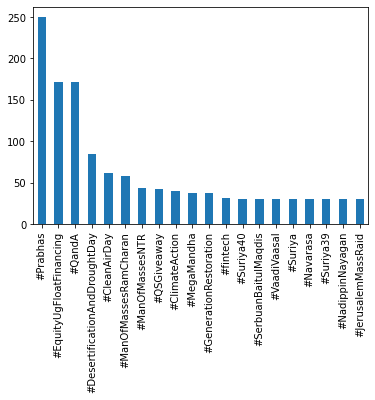

In [41]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


In [42]:
#ploting Tweets by language 
tweets = pd.DataFrame(columns=['text','lang'])

tweets['text'] =  tweets_df['clean_text'].to_list()
tweets['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

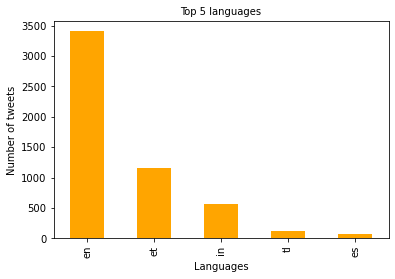

In [43]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [44]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [45]:
English_tweets

,original_text,clean_text,lang,hashtags,flattened_hashtags
0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en,[],#Desertification
3,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#biodiversity
4,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en,"[#GregHunt, #Morrison, #auspol]",#climatechange
5,Buy airtime across all networks from Mpesa eve...,Buy airtime across networks Mpesa even Fuliza ...,en,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,...",#GregHunt
6,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en,"[#Desertification, #Drought, #resilience, #bio...",#Morrison
...,...,...,...,...,...
5613,"Join @NPC_INDIA_GOV webinar on ""Carbon Credits...",Join webinar `` Carbon Credits Waste Managemen...,en,"[#npcindia, #webinar, #wastemgmt, #carboncredi...",NaN
5615,In the latest episode of @LanzaTech’s #CarbonS...,In latest episode podcast Unilevers Peter Ter ...,en,"[#CarbonSmart, #OurCleanFuture]",NaN
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",Lambie voted AGAINST Medivac Carbon tax protec...,en,[#QandA],NaN
5618,welkin moon giveaway bc i finally have money!\...,welkin moon giveaway bc finally money -u got t...,en,[],NaN


In [46]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


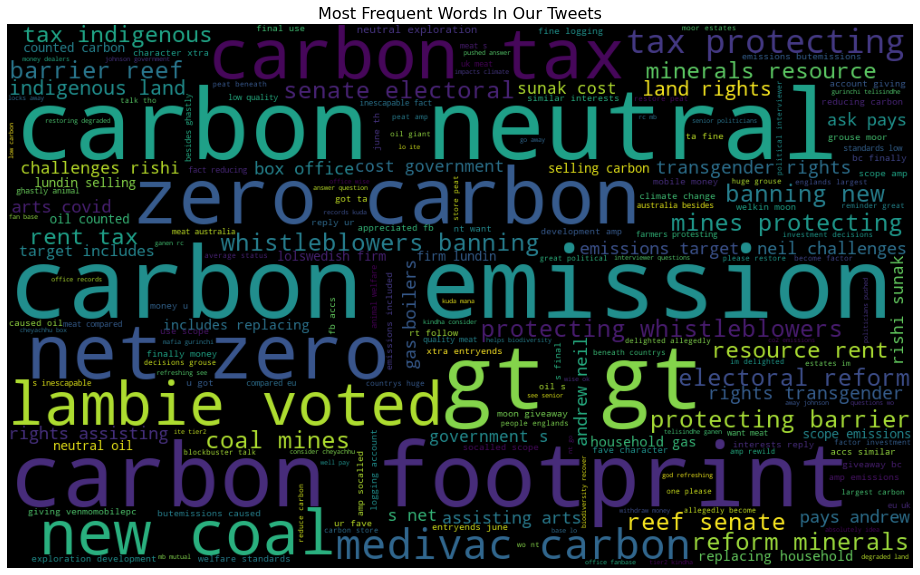

In [47]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [48]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['giving',
  'forth',
  'life',
  'becoming',
  'burden',
  'kenya',
  'this',
  'mother',
  'gave',
  'birth',
  'babies',
  'hard',
  'time',
  'meeting',
  'nutritional',
  'needs',
  'coz',
  'baby',
  'formula',
  'expensiveturn',
  'bundles',
  'tears',
  'joy',
  'giving',
  'handmpesa',
  'douglas',
  'nyaoko'],
 ['today',
  'world',
  'day',
  'combat',
  'restoring',
  'degraded',
  'land',
  'brings',
  'jobs',
  'food',
  'security',
  'helps',
  'recover',
  'slows',
  'locking',
  'away',
  'carbon',
  'all',
  'critical',
  'lifting',
  'many',
  'poverty']]

In [49]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ babies
1 ........ baby
2 ........ becoming
3 ........ birth
4 ........ bundles
5 ........ burden
6 ........ coz
7 ........ douglas
8 ........ expensiveturn
9 ........ formula
10 ........ forth
11 ........ gave
12 ........ giving
13 ........ handmpesa
14 ........ hard
15 ........ joy
16 ........ kenya
17 ........ life
18 ........ meeting
19 ........ mother
20 ........ needs
21 ........ nutritional
22 ........ nyaoko
23 ........ tears
24 ........ this
25 ........ time
26 ........ all
27 ........ away
28 ........ brings
29 ........ carbon
30 ........ combat
31 ........ critical
32 ........ day
33 ........ degraded
34 ........ food
35 ........ helps
36 ........ jobs
37 ........ land
38 ........ lifting
39 ........ locking
40 ........ many
41 ........ poverty
42 ........ recover
43 ........ restoring
44 ........ security
45 ........ slows
46 ........ today
47 ........ world
48 ........ confident
49 ........ delivered
50 ........ emissions
51 ........ g7
52 ........ hearing
53 ...

553 ........ take
554 ........ utah
555 ........ valley
556 ........ budgets
557 ........ effectively
558 ........ future
559 ........ happen
560 ........ help
561 ........ make
562 ........ meet
563 ........ next
564 ........ nine
565 ........ read
566 ........ report
567 ........ reveals
568 ........ says
569 ........ solar
570 ........ treble
571 ........ years
572 ........ champions
573 ........ congressional
574 ........ efforts
575 ........ fuels
576 ........ grateful
577 ........ integrity
578 ........ lawmakers
579 ........ lowcarbon
580 ........ producers
581 ........ refiners
582 ........ reject
583 ........ renewable
584 ........ standing
585 ........ undermine
586 ........ urged
587 ........ were
588 ........ heavily
589 ........ regulated
590 ........ ariel
591 ........ cycle
592 ........ difference
593 ........ easier
594 ........ home
595 ........ leaves
596 ........ making
597 ........ tide
598 ........ wash
599 ........ complexs
600 ........ militaryindustrial
601 ....

1219 ........ upgraded
1220 ........ applicants
1221 ........ apply
1222 ........ client
1223 ........ company
1224 ........ degree
1225 ........ field
1226 ........ national
1227 ........ opportunitya
1228 ........ personnel
1229 ........ service
1230 ........ studies
1231 ........ undergraduate
1232 ........ unitan
1233 ........ addition
1234 ........ brilliant
1235 ........ centres
1236 ........ city
1237 ........ closed
1238 ........ confusing
1239 ........ continue
1240 ........ creativity
1241 ........ culture
1242 ........ employees
1243 ........ enough
1244 ........ fallout
1245 ........ given
1246 ........ herald
1247 ........ mental
1248 ........ offices
1249 ........ piece
1250 ........ todays
1251 ........ toil
1252 ........ conditionsthanks
1253 ........ difficult
1254 ........ etc
1255 ........ indeed
1256 ........ issue
1257 ........ meme
1258 ........ naturally
1259 ........ nice
1260 ........ produced
1261 ........ sources
1262 ........ wasted
1263 ........ 10million
1

1885 ........ handy
1886 ........ marketing
1887 ........ matterand
1888 ........ produces
1889 ........ results
1890 ........ spread
1891 ........ among
1892 ........ collaboration
1893 ........ digitalization
1894 ........ manufacturers
1895 ........ race
1896 ........ swing
1897 ........ transparency
1898 ........ accelerate
1899 ........ efficiency
1900 ........ increase
1901 ........ industrial
1902 ........ innovate
1903 ........ levers
1904 ........ longterm
1905 ........ rational
1906 ........ anydaypk
1907 ........ mbah
1908 ........ troll
1909 ........ admit
1910 ........ chair
1911 ........ lunacy
1912 ........ questions
1913 ........ squirms
1914 ........ adaptation
1915 ........ capitalisation
1916 ........ considering
1917 ........ crucial
1918 ........ driving
1919 ........ gradually
1920 ........ increasing
1921 ........ infrastructure
1922 ........ reaction
1923 ........ bigging
1924 ........ councils
1925 ........ criticise
1926 ........ issues
1927 ........ its
1928 

2591 ........ unaccountable
2592 ........ watering
2593 ........ adding
2594 ........ ecocide
2595 ........ paid
2596 ........ statesponsored
2597 ........ 2030
2598 ........ by
2599 ........ ccac
2600 ........ chart
2601 ........ consistent
2602 ........ govts
2603 ........ mention
2604 ........ neglecting
2605 ........ pa
2606 ........ pathway
2607 ........ pathways
2608 ........ propose
2609 ........ reductions
2610 ........ relative
2611 ........ upper
2612 ........ became
2613 ........ february
2614 ........ law
2615 ........ literally
2616 ........ official
2617 ........ passed
2618 ........ phase
2619 ........ avert
2620 ........ bog
2621 ........ breakdown
2622 ........ combined
2623 ........ condition
2624 ........ each
2625 ........ favourable
2626 ........ france
2627 ........ germany
2628 ........ nation
2629 ........ rewetted
2630 ........ upland
2631 ........ warns
2632 ........ damage
2633 ........ 252
2634 ........ close
2635 ........ contestants
2636 ........ decide
26

3332 ........ diamondheated
3333 ........ engineer
3334 ........ gold
3335 ........ heated
3336 ........ ornament
3337 ........ wirecompressed
3338 ........ downturn
3339 ........ hence
3340 ........ landscapes
3341 ........ productive
3342 ........ thirds
3343 ........ trapping
3344 ........ inform
3345 ........ insights
3346 ........ caugh
3347 ........ chepandiwe
3348 ........ chesaru
3349 ........ cheyandi
3350 ........ cold
3351 ........ doctor
3352 ........ evarina
3353 ........ friends
3354 ........ gatham
3355 ........ hi
3356 ........ konchem
3357 ........ mannichi
3358 ........ me
3359 ........ medicine
3360 ........ nannu
3361 ........ pregnancy
3362 ........ tanaku
3363 ........ unate
3364 ........ undi
3365 ........ unnaee
3366 ........ veelunte
3367 ........ wife
3368 ........ rides
3369 ........ saved
3370 ........ voi
3371 ........ emission
3372 ........ highest
3373 ........ outlook
3374 ........ gw
3375 ........ operational
3376 ........ outlines
3377 ........ track
3

3918 ........ ipads
3919 ........ modern
3920 ........ thriving
3921 ........ wifi
3922 ........ declared
3923 ........ placebased
3924 ........ excellent
3925 ........ quickly
3926 ........ visual
3927 ........ charity
3928 ........ toolkit
3929 ........ dil
3930 ........ opposing
3931 ........ speaks
3932 ........ tds
3933 ........ votebut
3934 ........ amazon
3935 ........ dependent
3936 ........ peoples
3937 ........ richest
3938 ........ 2470usd
3939 ........ began
3940 ........ neat
3941 ........ quietly
3942 ........ both
3943 ........ characteristics
3944 ........ eda
3945 ........ fucks
3946 ........ habits
3947 ........ has
3948 ........ hiding
3949 ........ investigating
3950 ........ kiraz
3951 ........ parents
3952 ........ sake
3953 ........ serkan
3954 ........ serkans
3955 ........ shit
3956 ........ cooling
3957 ........ energyefficient
3958 ........ expected
3959 ........ frequent
3960 ........ indian
3961 ........ intense
3962 ........ manner
3963 ........ waves
3964

4551 ........ earners
4552 ........ most
4553 ........ biochar
4554 ........ cultivationpublication
4555 ........ dynamics
4556 ........ iron
4557 ........ nitrogenenriched
4558 ........ pollutionauthor
4559 ........ rice
4560 ........ tool
4561 ........ yield
4562 ........ oxford
4563 ........ resharing
4564 ........ swap
4565 ........ weekfind
4566 ........ agenthere
4567 ........ app1withdraw
4568 ........ appthere
4569 ........ closest
4570 ........ equiduuka
4571 ........ merchant
4572 ........ broad
4573 ........ context
4574 ........ passivhaus
4575 ........ precop26
4576 ........ wellbeing
4577 ........ householder
4578 ........ popularso
4579 ........ replace
4580 ........ cave
4581 ........ loincloth
4582 ........ nonsense
4583 ........ posturing
4584 ........ unless
4585 ........ wearing
4586 ........ accounts
4587 ........ appwith
4588 ........ can1
4589 ........ else
4590 ........ transferring
4591 ........ planes
4592 ........ producing
4593 ........ seaborne
4594 .......

In [50]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

NameError: name 'corpus_1' is not defined